### Questions

1. What was the change in price of the stock over time?
2. What was the dailt return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks? closing prices?
5. What was the correlation between different stocks? daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavoir?



In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [13]:
from pandas_datareader import data, wb
import pandas_datareader as pdr

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [28]:
tech_list = ['AAPL','GOOG','TSLA','AMZN']

In [29]:
end = datetime.now()

start = datetime(end.year - 1,end.month,end.day)

In [30]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_google(stock, start = start, end = end)

In [31]:
TSLA.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-01,221.48,222.40,216.89,219.56,2982695
2016-06-02,219.59,219.91,217.11,218.96,2032832
2016-06-03,220.00,221.94,218.01,218.99,2228970
2016-06-06,218.00,220.90,215.45,220.68,2249508
2016-06-07,222.24,234.44,221.52,232.34,6213573


In [32]:
TSLA.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,235.805397,239.117262,232.810397,236.091429,4.761835e+06
std,40.295673,40.838461,39.996431,40.653676,2.534995e+06
min,182.510000,184.730000,178.190000,181.450000,1.659530e+06
25%,202.490000,205.605000,200.240000,202.670000,3.202448e+06
50%,224.325000,227.335000,222.000000,224.810000,4.149676e+06
75%,257.077500,260.250000,253.542500,257.120000,5.691500e+06
max,337.690000,342.890000,335.160000,341.010000,2.374241e+07


In [33]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-06-01 to 2017-05-31
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


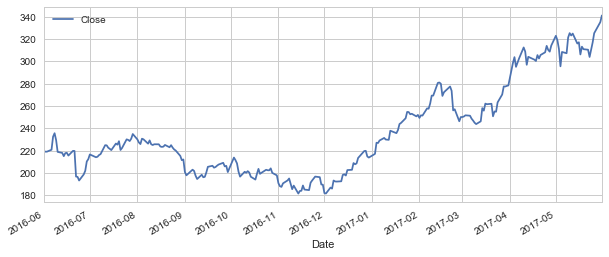

In [35]:
TSLA['Close'].plot(legend=True,figsize = (10,4))

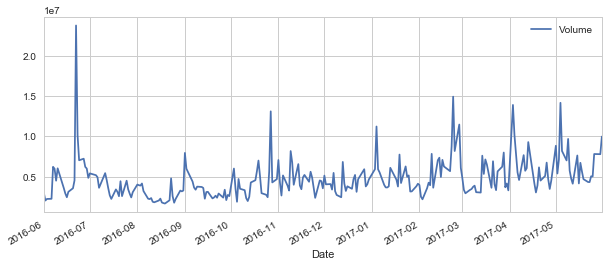

In [36]:
TSLA['Volume'].plot(legend=True,figsize = (10,4))

In [38]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    TSLA[column_name] = Series.rolling(TSLA['Close'], ma).mean()

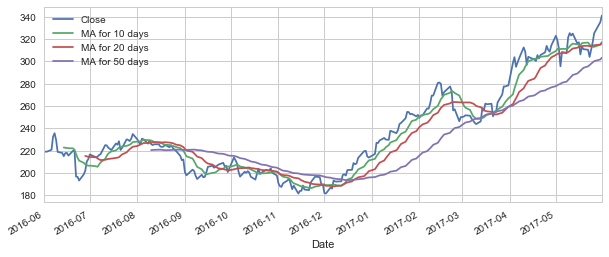

In [40]:
TSLA[['Close', 'MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

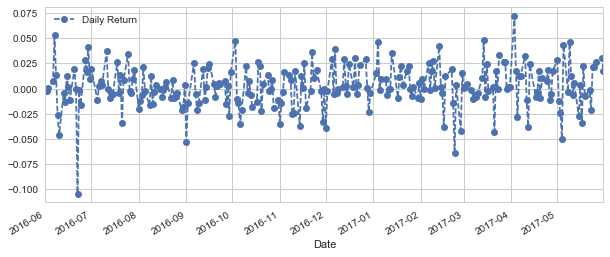

In [45]:
TSLA['Daily Return'] = TSLA['Close'].pct_change()

TSLA['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

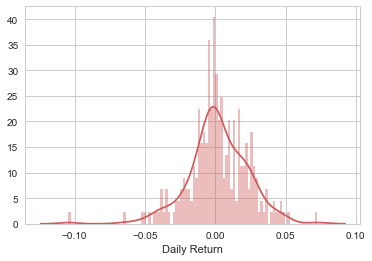

In [46]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='indianred')

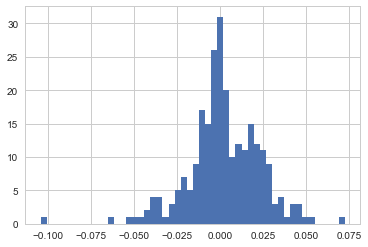

In [48]:
TSLA['Daily Return'].hist(bins=50)

In [49]:
closing = pdr.get_data_google(tech_list, start = start, end = end)['Close']

In [50]:
closing.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-06-01,98.46,719.44,734.15,219.56
2016-06-02,97.72,728.24,730.40,218.96
2016-06-03,97.92,725.54,722.34,218.99
2016-06-06,98.63,726.73,716.55,220.68
2016-06-07,99.03,723.74,716.65,232.34


In [51]:
closing.tail()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2017-05-24,153.34,980.35,954.96,310.22
2017-05-25,153.87,993.38,969.54,316.83
2017-05-26,153.61,995.78,971.47,325.14
2017-05-30,153.67,996.70,975.88,335.10
2017-05-31,152.76,994.62,964.86,341.01


In [53]:
tech_rets = closing.pct_change()

In [54]:
tech_rets.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-06-01,NaN,NaN,NaN,NaN
2016-06-02,-0.007516,0.012232,-0.005108,-0.002733
2016-06-03,0.002047,-0.003708,-0.011035,0.000137
2016-06-06,0.007251,0.001640,-0.008016,0.007717
2016-06-07,0.004056,-0.004114,0.000140,0.052837


In [56]:
tech_rets.describe()

,AAPL,AMZN,GOOG,TSLA
count,251.000000,251.000000,251.000000,251.000000
mean,0.001812,0.001357,0.001136,0.001982
std,0.011132,0.011508,0.009656,0.021236
min,-0.033576,-0.051371,-0.037970,-0.104503
25%,-0.003108,-0.004495,-0.003644,-0.008788
50%,0.000897,0.001305,0.000967,0.000957
75%,0.006270,0.007671,0.005565,0.016455
max,0.064963,0.039574,0.036271,0.072655


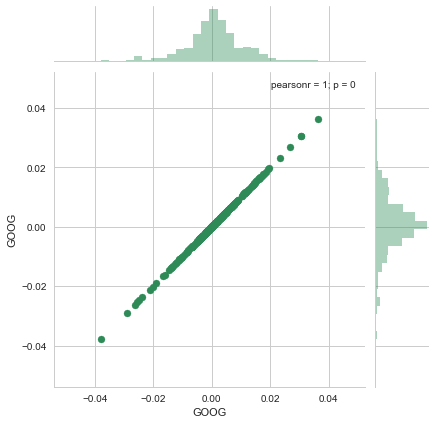

In [59]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

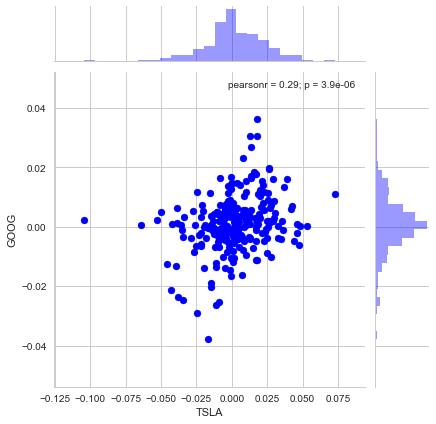

In [61]:
sns.jointplot('TSLA','GOOG',tech_rets,kind='scatter',color='blue')

In [62]:
tech_rets.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-06-01,NaN,NaN,NaN,NaN
2016-06-02,-0.007516,0.012232,-0.005108,-0.002733
2016-06-03,0.002047,-0.003708,-0.011035,0.000137
2016-06-06,0.007251,0.001640,-0.008016,0.007717
2016-06-07,0.004056,-0.004114,0.000140,0.052837


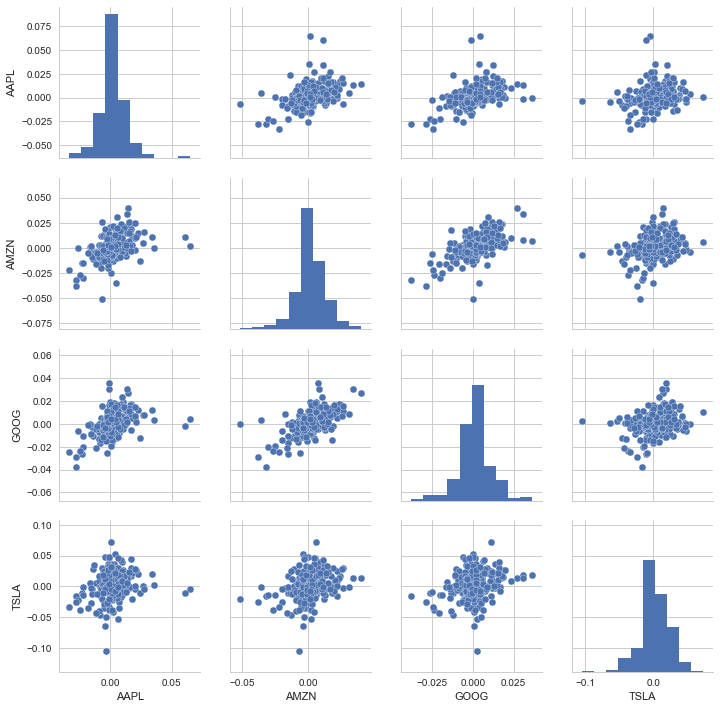

In [63]:
sns.pairplot(tech_rets.dropna())

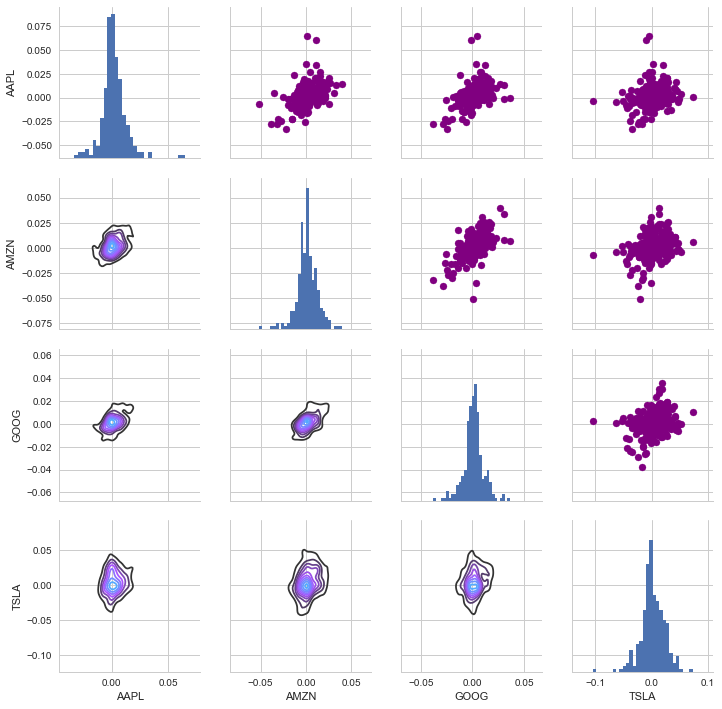

In [64]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

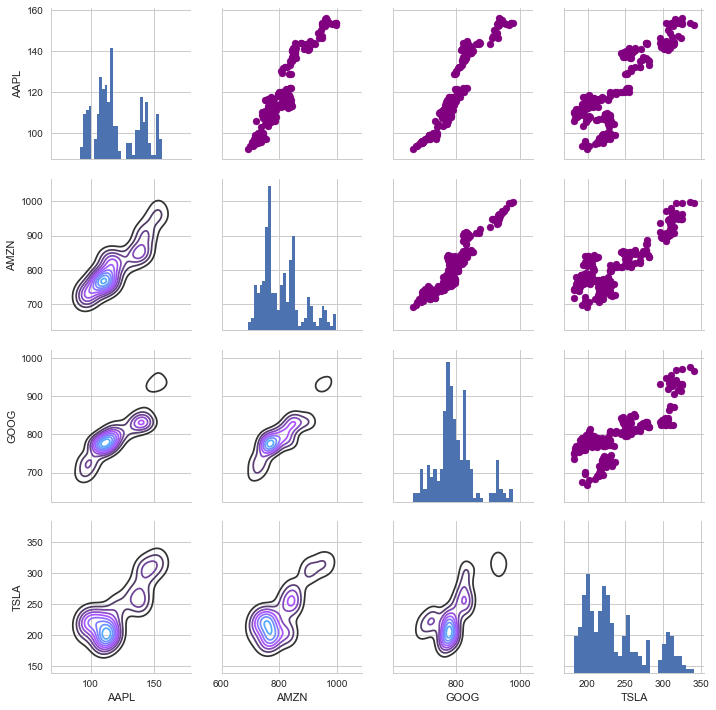

In [65]:
returns_fig = sns.PairGrid(closing)

returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

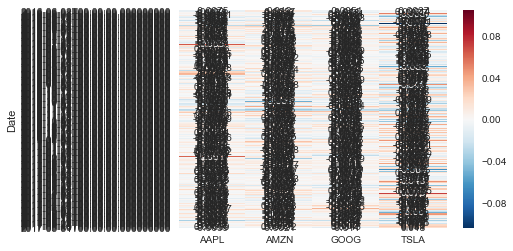

In [68]:

sns.heatmap(tech_rets.dropna(),annot=True)

In [69]:
# Risk Analysis of a Stock

rets = tech_rets.dropna()

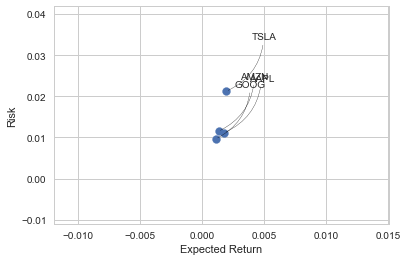

In [74]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords= 'offset points', ha='right', va='bottom',
    arrowprops = dict(arrowstyle= '-', connectionstyle='arc3,rad=-0.3'))

In [75]:
# Value at Risk with bootstrap

rets.head()



,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-06-02,-0.007516,0.012232,-0.005108,-0.002733
2016-06-03,0.002047,-0.003708,-0.011035,0.000137
2016-06-06,0.007251,0.001640,-0.008016,0.007717
2016-06-07,0.004056,-0.004114,0.000140,0.052837
2016-06-08,-0.000909,0.004007,0.016228,0.013687


In [77]:
# Bootstrap Method
rets['TSLA'].quantile(0.10)

-0.02184079601990041

In [78]:
#Monte Carlo Method

days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [79]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] =np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [80]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-01,734.53,737.21,730.66,734.15,1253593
2016-06-02,732.50,733.02,724.17,730.40,1341807
2016-06-03,729.27,729.49,720.56,722.34,1226253
2016-06-06,724.91,724.91,714.61,716.55,1566059
2016-06-07,719.84,721.98,716.55,716.65,1336754


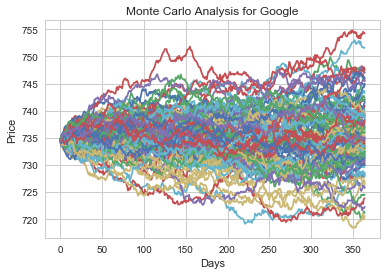

In [81]:
start_price = 734.53

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [82]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

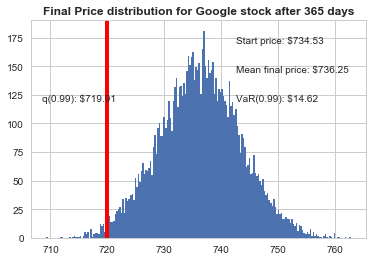

In [83]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)
# Mean Ending Price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

# Variance of the price
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q))

#Display 1% quantile
plt.figtext(0.15,0.6, 'q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u'Final Price distribution for Google stock after %s days' %days, weight='bold')

1. Estimate values at risk for non-technology stocks
2. Build a practice protfolio and see how well you can predict your risk values
3. Look further into correlation of two stock to see if it gives you any insight